# Upper Confidence Bound (UCB)

The Upper Confidence Bound (UCB) strategy is a fundamental approach in reinforcement learning that addresses the exploration-exploitation trade-off. It operates by assigning each action an upper confidence bound based on its estimated value and uncertainty, guiding the agent to balance between exploring potentially rewarding actions and exploiting known ones. By iteratively updating these bounds and selecting actions with the highest upper confidence bounds, the agent gradually learns to optimize its decision-making process over time. UCB is widely utilized in various domains, from recommendation systems to robotics, enabling efficient learning and maximizing cumulative rewards in uncertain environments.

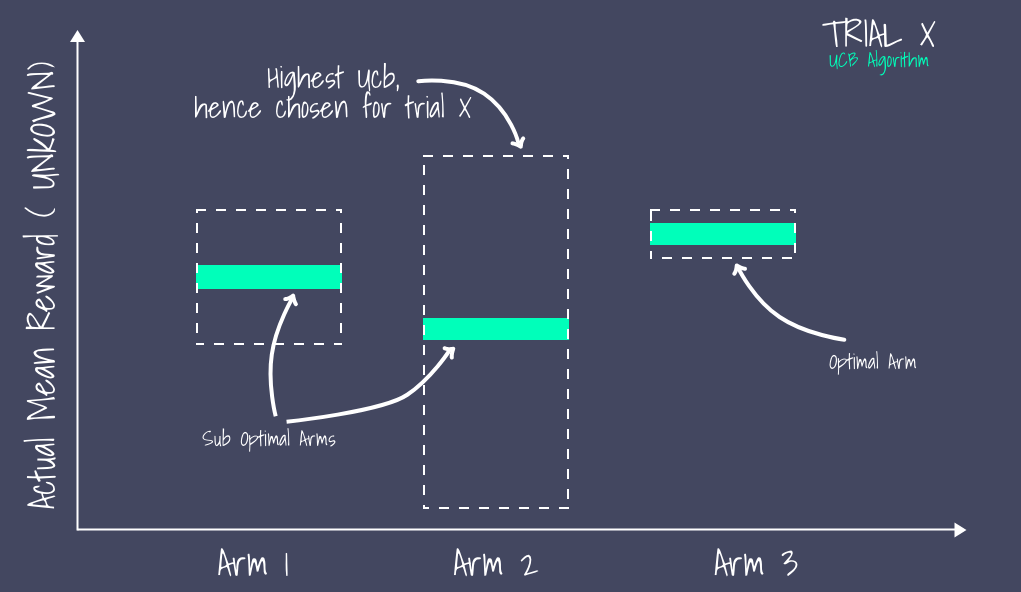

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [0]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

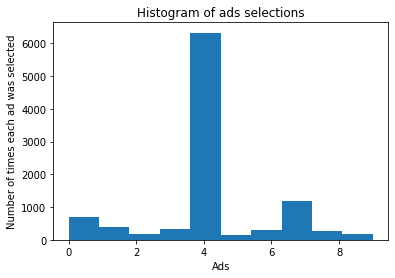

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()